### Vaccine Usage Prediction

Abstract:
Subjects receiving the same vaccine often show different levels of immune responses and some may even present adverse side effects to the vaccine. Systems vaccinology can combine data and machine learning techniques to obtain highly predictive signatures of vaccine immunogenicity and reactogenicity. Currently, several machine learning methods are already available to researchers with no background in bioinformatics



### Problem Statement:
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.



### Importing required libraries

Scope:
●	Exploratory data analysis
●	Data Pre-processing
●	Training logistic regression model with MLE for prediction
●	Tuning the model to improve the performance


Learning Outcome:
The students will get a better understanding of how the variables are linked to each other and how the EDA approach will help them gain more insights and knowledge about the data that we have and train Logistic Regression using MLE.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

### Reading the data

In [7]:
data=pd.read_csv(r"C:\Users\dell\Documents\Vaccine usage predection\Logistic Regresssion Project\Dataset\h1n1_vaccine_prediction.csv",index_col=0)
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
#Checking the data types available in the data
data.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [9]:
data.shape

(26707, 33)

In [10]:
data.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [11]:
for i in data.columns:
    if data[i].dtype=='object' or data[i].dtype=='bool':
        data[i].fillna(data[i].mode()[0],inplace=True)
    elif data[i].dtype=='int64' or data[i].dtype=='float64':
        data[i].fillna(round(data[i].mean()),inplace=True)

In [12]:
data.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [13]:
#Checking the unique value present in the data
for i in data.columns:
    print({i:data[i].unique()})

{'h1n1_worry': array([1., 3., 2., 0.])}
{'h1n1_awareness': array([0., 2., 1.])}
{'antiviral_medication': array([0., 1.])}
{'contact_avoidance': array([0., 1.])}
{'bought_face_mask': array([0., 1.])}
{'wash_hands_frequently': array([0., 1.])}
{'avoid_large_gatherings': array([0., 1.])}
{'reduced_outside_home_cont': array([1., 0.])}
{'avoid_touch_face': array([1., 0.])}
{'dr_recc_h1n1_vacc': array([0., 1.])}
{'dr_recc_seasonal_vacc': array([0., 1.])}
{'chronic_medic_condition': array([0., 1.])}
{'cont_child_undr_6_mnths': array([0., 1.])}
{'is_health_worker': array([0., 1.])}
{'has_health_insur': array([1., 0.])}
{'is_h1n1_vacc_effective': array([3., 5., 4., 2., 1.])}
{'is_h1n1_risky': array([1., 4., 3., 2., 5.])}
{'sick_from_h1n1_vacc': array([2., 4., 1., 5., 3.])}
{'is_seas_vacc_effective': array([2., 4., 5., 3., 1.])}
{'is_seas_risky': array([1., 2., 4., 3., 5.])}
{'sick_from_seas_vacc': array([2., 4., 1., 5., 3.])}
{'age_bracket': array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Yea

In [14]:
#for differentiationg categorical variables of object type
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
colname

['age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa']

In [15]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    data[x]=le.fit_transform(data[x])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature age_bracket
mapping {'18 - 34 Years': 0, '35 - 44 Years': 1, '45 - 54 Years': 2, '55 - 64 Years': 3, '65+ Years': 4}
Feature qualification
mapping {'12 Years': 0, '< 12 Years': 1, 'College Graduate': 2, 'Some College': 3}
Feature race
mapping {'Black': 0, 'Hispanic': 1, 'Other or Multiple': 2, 'White': 3}
Feature sex
mapping {'Female': 0, 'Male': 1}
Feature income_level
mapping {'<= $75,000, Above Poverty': 0, '> $75,000': 1, 'Below Poverty': 2}
Feature marital_status
mapping {'Married': 0, 'Not Married': 1}
Feature housing_status
mapping {'Own': 0, 'Rent': 1}
Feature employment
mapping {'Employed': 0, 'Not in Labor Force': 1, 'Unemployed': 2}
Feature census_msa
mapping {'MSA, Not Principle  City': 0, 'MSA, Principle City': 1, 'Non-MSA': 2}


In [16]:
X=data.values[:,0:-1]
Y=data.values[:,-1]

In [17]:
print(X.shape)
print(Y.shape)

(26707, 32)
(26707,)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)#fit will lear mean and sigma values 
#scaler.fit_transform(X)
#X=scaler.transform(X)
print(X)
# only X is to be scaled Y does not have discreprency

[[-0.68184881 -2.04427905 -0.22629268 ...  1.4168754  -1.18346335
  -0.5826811 ]
 [ 1.51837305  1.19702709 -0.22629268 ... -1.01237871 -1.18346335
  -0.5826811 ]
 [-0.68184881 -0.42362598 -0.22629268 ... -1.01237871  1.48332333
  -0.5826811 ]
 ...
 [ 0.41826212  1.19702709 -0.22629268 ... -1.01237871 -1.18346335
  -0.5826811 ]
 [-0.68184881 -0.42362598 -0.22629268 ...  1.4168754   0.14992999
  -0.5826811 ]
 [-1.78195974 -2.04427905 -0.22629268 ...  0.20224834  0.14992999
  -0.5826811 ]]


In [19]:
#Splitting the data
from sklearn.model_selection import train_test_split

#split the data into test and train 
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3,random_state=10)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18694, 32)
(18694,)
(8013, 32)
(8013,)


In [21]:
# BUILDING MODEL
from sklearn.linear_model import LogisticRegression
#create a model object 
classifier=LogisticRegression()
#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 1.]


In [22]:
#print(list(zip(Y_test,Y_pred)))

print(list(zip(data[:-1],classifier.coef_.ravel())))
print(classifier.intercept_)
#classifier.coef_
#ravel coefficient is used for ------------

[('h1n1_worry', -0.09140330604984585), ('h1n1_awareness', 0.10493905298654191), ('antiviral_medication', 0.022826511784718277), ('contact_avoidance', -0.0076019620069912724), ('bought_face_mask', 0.049294028498516114), ('wash_hands_frequently', 0.012562591666358912), ('avoid_large_gatherings', -0.11563582874514783), ('reduced_outside_home_cont', -0.009575734970125772), ('avoid_touch_face', 0.03282368902927395), ('dr_recc_h1n1_vacc', 0.7978453181515301), ('dr_recc_seasonal_vacc', -0.2108781032145752), ('chronic_medic_condition', 0.03460178476470447), ('cont_child_undr_6_mnths', 0.050325265005783715), ('is_health_worker', 0.25653804035575467), ('has_health_insur', 0.03823152112304406), ('is_h1n1_vacc_effective', 0.5962054160760866), ('is_h1n1_risky', 0.4714838569470288), ('sick_from_h1n1_vacc', -0.02300159223780885), ('is_seas_vacc_effective', 0.10578550028694224), ('is_seas_risky', 0.18464098757198472), ('sick_from_seas_vacc', -0.09109739253808534), ('age_bracket', 0.16180198163767232),

In [23]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)
# 0--->did not receive the vaccine---No
# 1--->recived the vaccine----Yes

[[5983  336]
 [ 970  724]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      6319
         1.0       0.68      0.43      0.53      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.69      0.71      8013
weighted avg       0.82      0.84      0.82      8013

Accuracy of the model:  0.8370148508673406


### Adjusting the threshold

In [24]:
# store the predicted probabilities
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.81479014 0.18520986]
 [0.77824577 0.22175423]
 [0.92504213 0.07495787]
 ...
 [0.91613094 0.08386906]
 [0.54434289 0.45565711]
 [0.31907543 0.68092457]]


In [25]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [26]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[5781  538]
 [ 772  922]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      6319
         1.0       0.63      0.54      0.58      1694

    accuracy                           0.84      8013
   macro avg       0.76      0.73      0.74      8013
weighted avg       0.83      0.84      0.83      8013

Accuracy of the model:  0.83651566204917


In [27]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1310  , type 2 error : 772  , type 1 error: 538
Errors at threshold  0.41000000000000003 : 1311  , type 2 error : 796  , type 1 error: 515
Errors at threshold  0.42000000000000004 : 1307  , type 2 error : 819  , type 1 error: 488
Errors at threshold  0.43000000000000005 : 1303  , type 2 error : 836  , type 1 error: 467
Errors at threshold  0.44000000000000006 : 1305  , type 2 error : 855  , type 1 error: 450
Errors at threshold  0.45000000000000007 : 1308  , type 2 error : 882  , type 1 error: 426
Errors at threshold  0.4600000000000001 : 1297  , type 2 error : 899  , type 1 error: 398
Errors at threshold  0.4700000000000001 : 1289  , type 2 error : 915  , type 1 error: 374
Errors at threshold  0.4800000000000001 : 1291  , type 2 error : 931  , type 1 error: 360
Errors at threshold  0.4900000000000001 : 1292  , type 2 error : 947  , type 1 error: 345
Errors at threshold  0.5000000000000001 : 1306  , type 2 error : 970  , type 1 error: 336
Errors at threshold 

In above try  reducing type 2 and total error and select the threshold accordingly.

In this case it is 0.47

In [28]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.4600000000000001  :
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [29]:
y_pred_prob

array([[0.81479014, 0.18520986],
       [0.77824577, 0.22175423],
       [0.92504213, 0.07495787],
       ...,
       [0.91613094, 0.08386906],
       [0.54434289, 0.45565711],
       [0.31907543, 0.68092457]])

In [30]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[5921  398]
 [ 899  795]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6319
         1.0       0.67      0.47      0.55      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.70      0.73      8013
weighted avg       0.83      0.84      0.83      8013

Accuracy of the model:  0.8381380257082242


In [31]:
#In case of delimaa to decide using area under curve 
#overall auc of the prob values
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])#false positive rate & true positivity rate 
auc = metrics.auc(fpr,tpr)

print(auc)

0.8364485828519262


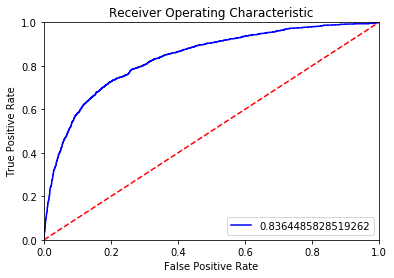

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [33]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.4600000000000001 :
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [34]:
#In case of delimaa to decide using area under curve 
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)#false positive rate & true positivity rate 
auc = metrics.auc(fpr,tpr)

print(auc)
print(fpr)
print(tpr)

0.7031593871895129
[0.         0.06298465 1.        ]
[0.         0.46930342 1.        ]


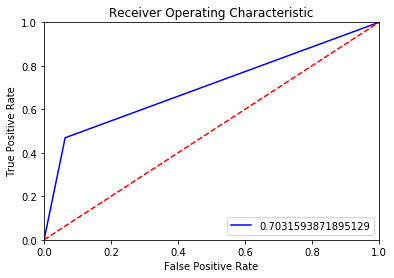

In [35]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

USING SGD CLASSIFIER

In [36]:
#SPLITTING THE DATA for SGD
from sklearn.model_selection import train_test_split

#split the data into test and train 
X_train1, X_test1, Y_train1, Y_test1= train_test_split(X, Y, test_size=0.3,random_state=10)

In [37]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,learning_rate="constant",
                         eta0=0.00001,max_iter=1000, shuffle=True,
                        early_stopping=True,n_iter_no_change=5)#loss can be log and hinge , random_state for shufling,n_iter_no_change=no of iteration for zero convergence 
#fitting training data to the model
classifier.fit(X_train1,Y_train1)

Y_pred1=classifier.predict(X_test1)
#print(list(zip(Y_test1,Y_pred1)))

#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

In [38]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred1)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred1))

acc=accuracy_score(Y_test, Y_pred1)
print("Accuracy of the model: ",acc)

[[5430  889]
 [ 673 1021]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      6319
         1.0       0.53      0.60      0.57      1694

    accuracy                           0.81      8013
   macro avg       0.71      0.73      0.72      8013
weighted avg       0.81      0.81      0.81      8013

Accuracy of the model:  0.8050667665044303


In [39]:
classifier.n_iter_

6

In [40]:
classifier.t_

112165.0

In [41]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)#random_state =shuffle the data
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.84171123 0.83048128 0.83743316 0.82566845 0.84269663 0.82932049
 0.84055645 0.82664526 0.83895131 0.83681113]
0.8350275391055298


In [42]:
#model tuning using cross validation if the base model is not accepted
#only implement if there is drastic difference accuracy score

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])#classifier pointing to Logistic regression

    
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [43]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[5984  335]
 [ 969  725]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      6319
         1.0       0.68      0.43      0.53      1694

    accuracy                           0.84      8013
   macro avg       0.77      0.69      0.71      8013
weighted avg       0.82      0.84      0.82      8013

Accuracy of the model:  0.8372644452764259
